# Example: Elliptical Orbit

A geocentric elliptical orbit has a perigee radius of 9600 km and an apogee radius of 21,000 km. Calculate the time to fly from perigee to a true anomaly of $\nu =$ 120°. Then, calculate the true anomaly 3 hr after perigee.

## Given True Anomaly, Find Time Since Perigee

The three steps of the solution procedure when we are given $\nu$ and want to find $t$ are:

1. Calculate the eccentric anomaly, $E$, from the true anomaly, $\nu$
2. Calculate the mean anomaly, $M_e$, from the eccentric anomaly
3. Calculate the time since periapsis, $t$, from the mean anomaly

To complete these steps, we require two other orbital elements besides the true anomaly:

1. **eccentricity**, $e$
2. **semimajor axis**, $a$

Let's find $e$ first, since it is the only orbital element that appears in Eq. {eq}`eq:eccentric-anomaly-true-anomaly-ellipse` to find $E$. We can find $e$ directly using Eq. {eq}`eq:ellipse-eccentricity-periapsis-apoapsis`, repeated here for reference:

:::{math}
e = \frac{r_a - r_p}{r_a + r_p}
:::

In [1]:
# %matplotlib notebook
import numpy as np
from scipy.optimize import newton

mu = 3.986004418E5  # km**3/s**2

r_p = 9_600  # km
r_a = 21_000  # km
nu_1 = np.radians(120)
e = (r_a - r_p)/(r_a + r_p)

In [2]:
from functools import partial
from myst_nb import glue as myst_glue
glue = partial(myst_glue, display=False)
glue("ellipse-time-since-periapsis-e", e)

0.37254901960784315

The eccentricity of this orbit is $e =$ {glue:text}`ellipse-time-since-periapsis-e:.4f`. Then, the eccentric anomaly found from Eq. {eq}`eq:eccentric-anomaly-true-anomaly-ellipse` is:

In [3]:
E_1 = 2 * np.arctan(np.sqrt((1 - e)/(1 + e)) * np.tan(nu_1 / 2))

In [4]:
glue("ellipse-time-since-perigee-E_1", E_1)

1.7280703972684424

The eccentric anomaly is $E_1 =$ {glue:text}`ellipse-time-since-perigee-E_1:.2f` radians. The subscript 1 indicates this is the first part of this example.

Now, to find the time to fly to the true anomaly of 120°, we need to find $M_e$. This is done with Kepler's equation, Eq. {eq}`eq:keplers-equation-ellipse`.

In [5]:
M_e1 = E_1 - e * np.sin(E_1)

In [6]:
glue("ellipse-time-since-perigee-M_e1", M_e1)

1.3601194129958558

The mean anomaly is $M_{e,1} =$ {glue:text}`ellipse-time-since-perigee-M_e1:.2f` radians. Finally, calculating the time from the mean anomaly requires the period.

In [7]:
a = (r_a + r_p) / 2
T = 2 * np.pi / np.sqrt(mu) * a**(3 / 2)
t_1 = M_e1 * T / (2 * np.pi)

In [8]:
glue("ellipse-time-since-perigee-a", a)
glue("ellipse-time-since-perigee-T", T / 3600)
glue("ellipse-time-since-perigee-t_1", t_1)
glue("ellipse-time-since-perigee-t_1-hr", t_1 / 3600)

15300.0

5.231733652520294

4077.043054361004

1.1325119595447233

The semimajor axis of the orbit is $a =$ {glue:text}`ellipse-time-since-perigee-a:.2f` km, the period is $T =$ {glue:text}`ellipse-time-since-perigee-T:.2f` hr, and the transit time is $t_1 =$ {glue:text}`ellipse-time-since-perigee-t_1-hr:.2f` hr.

### MATLAB Solution

In MATLAB, the following code will give the same result:

```matlab
function kepler
    mu = 3.986e5; % km^3/s^2
    rp = 9600; % km
    ra = 21000; % km
    e = (ra - rp)/(ra + rp);
    a = (rp + ra)/2;
    T = 2*pi/sqrt(mu)*a^(3/2);
    nu1 = deg2rad(120);
    E1 = 2*atan(sqrt((1-e)/(1+e))*tan(nu1/2));
    Me1 = E1 - e*sin(E1);
    t1 = Me1*T/(2*pi);
    fprintf('t₁=%.2f hr\n', t1/3600)
end
```

## Given Time Since Perigee, Find True Anomaly

Now, let's calculate the true anomaly about 2 hours later, after 3 total hours since perigee have elapsed. The steps for this process are:

1. Using time since perigee, $t$, find the mean anomaly, $M_e$
2. Using the mean anomaly, find the eccentric anomaly, $E$
3. Using the eccentric anomaly, find the true anomaly, $\nu$

First, the mean anomaly. Since we already have the period of this orbit, we do not need to recalculate it.

In [9]:
t_2 = 3 * 3600  # hr
M_e2 = 2 * np.pi * t_2 / T

In [10]:
glue("ellipse-time-since-perigee-M_e2", M_e2)

3.6029272844305296

The mean anomaly is $M_{e,2} =$ {glue:text}`ellipse-time-since-perigee-M_e2:.2f` radians. Now, we need to solve Kepler's equation to find the eccentric anomaly, $E$. Since the equation is transcendental in $E$, we need to use the Newton solver in SciPy. Since we know the derivative, we will define two Python functions:

1. Kepler's equation, $f(E) = 0$
2. The derivative of Kepler's equation with respect to $E$, $f'(E)$

In [11]:
def kepler(E, M_e, e):
    """Kepler's equation, to be used in a Newton solver."""
    return E - e * np.sin(E) - M_e

def d_kepler_d_E(E, M_e, e):
    """The derivative of Kepler's equation, to be used in a Newton solver.
    
    Note that the argument M_e is unused, but must be present so the function
    arguments are consistent with the kepler function.
    """
    return 1 - e * np.cos(E)

E_2 = newton(func=kepler, fprime=d_kepler_d_E, x0=np.pi, args=(M_e2, e))

In [12]:
glue("ellipse-time-since-perigee-E_2", E_2)

3.4794424731828038

In the `newton()` function, we passed the function to solve, `kepler`, the derivative of that function, an initial guess, and the additional arguments. We chose $\pi$ radians as the initial guess because it's in the middle of the expected range. The eccentric anomaly is $E_2 =$ {glue:text}`ellipse-time-since-perigee-E_2:.2f` radians.

Now, we can calculate the value for $\nu$. To avoid the quadrant ambiguity, we will use Eq. {eq}`eq:eccentric-anomaly-true-anomaly-ellipse`.

In [13]:
sqrt_e_ratio = np.sqrt((1 + e) / (1 - e))
nu_2 = (2 * np.arctan(sqrt_e_ratio * np.tan(E_2 / 2))) % (2 * np.pi)

In [14]:
glue("ellipse-time-since-perigee-nu_2", np.degrees(nu_2))

193.15579284770817

The true anomaly after 3 hours since perigee passage is $\nu_2 =$ {glue:text}`ellipse-time-since-perigee-nu_2:.2f`°.

To convert $\nu_2$ to the range $[0, 2\pi)$, we take the modulus with $2\pi$. In most programming languages, Python and MATLAB included, `arctan()` returns a value between $-\pi/2$ and $\pi/2$. When the result is multiplied by 2, it gives the range from $-\pi$ to $\pi$. We want to transform this angle to be in the range of $0$ to $2\pi$. To do so, we take the **modulus** of the angle with $2\pi$.

The modulus is the remainder after division. In Python, the modulus operator is `%`, while in MATLAB, we have to use the function `mod(numerator, denominator)`. This works for both positive and negative numbers, and ensures that we get the correct angle for the appropriate quadrant.

### MATLAB Solution

In MATLAB, the following code will give the same result:

```matlab
function kepler
    mu = 3.986e5; % km^3/s^2
    rp = 9600; % km
    ra = 21000; % km
    e = (ra - rp)/(ra + rp);
    a = (rp + ra)/2;
    T = 2 * pi / sqrt(mu) * a^(3/2);
    t2 = 3 * 3600; % sec
    Me2 = 2 * pi * t_2 / T;

    function x = fun(E, M_e, e)
        x = E - e * sin(E) - M_e;
    end

    E2 = fzero(@(x) fun(x, M_e, e), [0, 2*pi]);
    nu2 = 2 * atan(sqrt((1 + e) / (1 - e)) * tan(E / 2));
    nu2 = mod(nu2, 2 * pi);
    fprintf('nu₂=%.2f°\n', rad2deg(nu2))
end
```

We are using `fzero()` again to solve Kepler's equation. I'm not sure how sensitive `fzero()` will be to the initial guess.

{numref}`fig:ellipse-time-since-perigee-figure` shows a plot of this orbit.

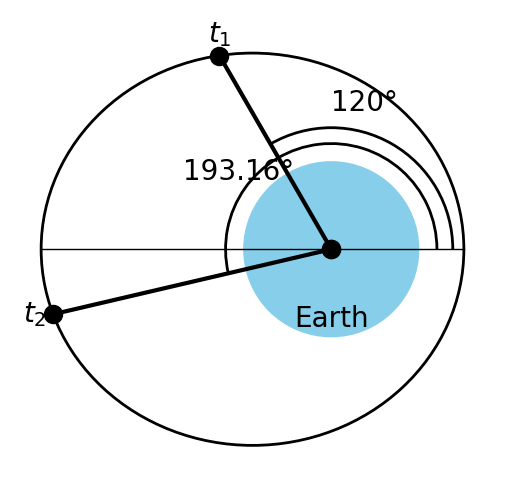

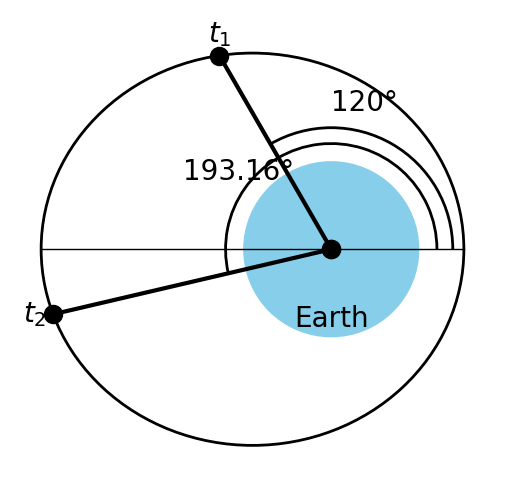

In [15]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle, Arc, Rectangle
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
ax.set_aspect("equal")
ax.axis("off")

b = a * np.sqrt(1 - e**2)
ax.add_patch(Ellipse((0, 0), 2*a, 2*b, facecolor="None", edgecolor="black"))
ellipse_focus = np.sqrt(a**2 - b**2)
ax.add_patch(Circle((ellipse_focus, 0), 6378, facecolor="skyblue"))
ax.add_patch(Arc((ellipse_focus, 0), a, a, theta2=np.degrees(nu_2)))
ax.add_patch(Arc((ellipse_focus, 0), 1.15*a, 1.15*a, theta2=np.degrees(nu_1)))
ax.annotate(f"{np.degrees(nu_1):.0F}°", xy=(ellipse_focus, 10000))
ax.annotate(f"{np.degrees(nu_2):.2F}°", xy=(-5000, 5000))
ax.plot((-a, a), (0, 0), color="k", lw=0.5)
r_1 = a * (1 - e**2) / (1 + e * np.cos(nu_1))
x_1 = r_1 * np.cos(nu_1) + ellipse_focus
y_1 = r_1 * np.sin(nu_1)
r_2 = a * (1 - e**2) / (1 + e * np.cos(nu_2))
x_2 = r_2 * np.cos(nu_2) + ellipse_focus
y_2 = r_2 * np.sin(nu_2)
ax.plot((ellipse_focus, x_1), (0, y_1), "ko-")
ax.annotate("$t_1$", xy=(x_1, y_1 + 500), ha="center", va="bottom")
ax.plot((ellipse_focus, x_2), (0, y_2), "ko-")
ax.annotate("$t_2$", xy=(x_2 - 500, y_2), ha="right", va="center")
ax.annotate("Earth", xy=(ellipse_focus, -5000), ha="center", va="center");
glue("ellipse-time-since-perigee-figure", fig)

:::{glue:figure} ellipse-time-since-perigee-figure
:name: fig:ellipse-time-since-perigee-figure

The orbit in this example showing the two time points, at 120° true anomaly and 3 hours after perigee.
:::